# **An Introduction to PROTACs**


### David Zhang and David Figueroa

This DeepChem tutorial serves as a foundation for exploring the world of PROTACs and the exciting field of targeted protein degradation. PROTACs represent an emerging wave of new therapeutics capable of modulating proteins once thought nearly impossible to target. By eliminating rather than merely inhibiting disease-causing proteins, PROTACs address the limitations of existing drug modalities. As PROTACs progress through clinical trials with promising results, there is growing anticipation surrounding their therapeutic potential, especially in oncological settings. With this clinical proof of concept, there is burgeoning interest in enhancing target degradation properties to expand their application across various disease states. This tutorial aims to provide a primer into how the scientific world may think about PROTACs along with their chemical and biological properties.



## 1. Introduction

Traditional drug modalities, such as small-molecule drugs or monoclonal antibodies, are limited to certain modes of action, like targeting specific receptors or blocking particular pathways. Targeted protein degradation (TPD) represents a promising new approach to modulate proteins that have been traditionally difficult to target. A major class of molecules whose mechanism of action is TPD are known as proteolysis-targeting chimera (PROTAC) protein degraders. These heterobifunctional molecules utilize the ubiquitin-proteasome system to induce ubiquitylation and ensuing degradation of the protein of interest.

### 1.1 How do PROTACs work?

PROTAC molecules are ternary structures consisting of a linker, a ligand to recruit and bind to the target protein, and a ligand to recruit the E3 ubiquitin ligase. Before we dive into how PROTACs mediate this degradation mechanism, it is crucial to understand the underlying biological pathway that makes this all possible.

\\

#### 1.1.1 Ubiquitin Proteasome System

The ubiquitin proteasome system, or UPS for short, is a crucial cellular maintenance mechanism. Ubiquitin-dependent proteolysis is a three-step process which involves ubiquitin-activating enzymes (E1), ubiquitin-conjugate enzymes (E2), and ubiquitin-protein ligases (E3). In general, E1 activates ubiquitin, priming it for transfer to E2 which interacts with E3 at which point E3 ligases are responsible for binding of the target protein substrate for subsequent ubiquitination by E2. Once the protein is tagged with a polyubiquitin chain, it is recognized by the proteasome, a large protease complex that degrades that protein into peptides.  

![ups.png](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3466981/bin/ijcep0005-0726-f1.jpg)

\\

#### 1.1.2 Connection to PROTACs

The realization that the UPS could be leveraged for therapeutic purposes was initially made through early studies of viruses and plants. The underlying idea involves design of small molecules capable of recruiting the E3 ligase and inducing degradation of a protein of interest (POI). This general idea naturally extended itself to the case of PROTACs. Together, the POI ligand, linker, and E3 ligase ligand make up the PROTAC complex responsible for protein degradation. Note that the presence of two ligands enables simultaneous  recruitment of the E3 ligase and POI, hence its heterobifunctionality property.

Furthermore, after the POI is degraded by the proteasome, PROTACs can disassociate and continue to induce further degradation, enabling low concentrations to be efficacious. This catalytic mechanism of action and event-drive pharmacology prevents PROTACs from suffering the same limitations as conventional therapeutic strategies such as drug resistance and off-target effects.

![protac.png](https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fs41392-019-0101-6/MediaObjects/41392_2019_101_Fig1_HTML.png?as=webp)

### 1.2 How can we leverage machine learning?

As a novel and promising technique, PROTACs have demonstrated positive clinical results thus far. However, much of the clinical validation has been against classically drugged targets. In order for PROTACs to reach their full potential, their clinical efficacy against novel or hard to reach targets must be demonstrated. Consequently, there has been growing research in designing PROTAC molecules capable of elicting an effective response. However, much of the current work is empirical and requires extensive trial-and-error processes. Machine learning could potentially revolutionize this. By correlating molecular structure with physiochemical properties and biological activity, we could potentially streamline the discovery process, significantly reducing the time and cost associated with validation. 




For a more in-depth dive into PROTACs, ubiquitin proteasome system, and targeted protein degradation, readers are referred to "[PROTAC targeted protein degraders: the past is prologue](https://www.nature.com/articles/s41573-021-00371-6)" and "[An overview of PROTACs: a promising drug discovery paradigm](https://link.springer.com/article/10.1186/s43556-022-00112-0)."


In general, this tutorial serves as a starting point to explore the world of PROTACs and targeted protein degradation. The tutorial is divided into three partitions:
1. Data Cleaning
2. Featurization 
3. Model training and inference

With that in mind, let's jump into this tutorial to predict efficacy of PROTAC degraders!

## Setup

Before we proceed, let's install deepchem into our colab environment.

In [ ]:
!pip install deepchem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 10.7 MB/s eta 0:00:00


## Data extraction

Now let's download this dataset on PROTACs, curated by [Hou et al.](https://academic.oup.com/nar/article/51/D1/D1367/6775390), which includes 3270 PROTACs.

In [ ]:
import deepchem as dc
import pandas as pd
import os
import numpy as np

Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


In [ ]:
os.system('wget http://cadd.zju.edu.cn/protacdb/statics/binaryDownload/csv/protac/protac.csv')

0

In [ ]:
protac_db = pd.read_csv('protac.csv')

Taking a closer look at the dataset, each PROTAC compound has a SMILEs representation along with its target protein of interest and E3 ligase.

In [ ]:
# Note that the same PROTAC compound can have the same target protein of interest (POI)
print('There are {} unique PROTAC compounds, targeting {} proteins for a total of {} combinations'.format(len(protac_db['Compound ID'].unique()),
                                                                                   len(protac_db['Target'].unique()), protac_db.shape[0]))
protac_db

There are 3270 unique PROTAC compounds, targeting 323 proteins for a total of 5388 combinations


,Compound ID,Uniprot,Target,E3 ligase,PDB,Name,Smiles,DC50 (nM),Dmax (%),Assay (DC50/Dmax),...,XLogP3,Heavy Atom Count,Ring Count,Hydrogen Bond Acceptor Count,Hydrogen Bond Donor Count,Rotatable Bond Count,Topological Polar Surface Area,Molecular Formula,InChI,InChI Key
0,1,Q9NPI1,BRD7,VHL,NaN,NaN,COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...,NaN,NaN,NaN,...,3.03,68,7,15,3,19,189.92,C50H64N8O9S,InChI=1S/C50H64N8O9S/c1-32-45(68-31-53-32)34-1...,RPMQBLMPGMFXLD-PDUNVWSESA-N
1,1,Q9H8M2,BRD9,VHL,NaN,NaN,COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...,NaN,NaN,NaN,...,3.03,68,7,15,3,19,189.92,C50H64N8O9S,InChI=1S/C50H64N8O9S/c1-32-45(68-31-53-32)34-1...,RPMQBLMPGMFXLD-PDUNVWSESA-N
2,2,Q9NPI1,BRD7,VHL,NaN,NaN,COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...,NaN,NaN,NaN,...,2.74,74,7,17,3,25,208.38,C54H72N8O11S,InChI=1S/C54H72N8O11S/c1-36-49(74-35-57-36)38-...,NGWWVKZONFCNQP-SHPBXJAASA-N
3,2,Q9H8M2,BRD9,VHL,NaN,NaN,COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...,NaN,NaN,NaN,...,2.74,74,7,17,3,25,208.38,C54H72N8O11S,InChI=1S/C54H72N8O11S/c1-36-49(74-35-57-36)38-...,NGWWVKZONFCNQP-SHPBXJAASA-N
4,3,Q9H8M2,BRD9,CRBN,NaN,NaN,COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...,NaN,NaN,NaN,...,0.70,61,7,15,3,18,202.97,C43H50N8O10,InChI=1S/C43H50N8O10/c1-48-24-31(28-9-10-44-23...,RMBNUDOJPQLHMV-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5383,3266,O60885,BRD4,FEM1B,NaN,NaN,CC1=C(C)C2=C(S1)N1C(C)=NN=C1[C@H](CC(=O)NCCOCC...,1600,80,Degradation of BRD4 in HEK293T cells after 8 h...,...,3.28,64,6,15,2,24,194.76,C44H53Cl2N9O8S,InChI=1S/C44H53Cl2N9O8S/c1-29-30(2)64-44-41(29...,UUCUKSPUFPMKNK-DHUJRADRSA-N
5384,3267,NaN,BCR-ABL,FEM1B,NaN,NaN,CC1=NC(NC2=NC=C(C(=O)NC3=C(C)C=CC=C3Cl)S2)=CC(...,NaN,NaN,NaN,...,5.92,58,6,13,3,17,171.95,C40H47Cl2N11O4S,InChI=1S/C40H47Cl2N11O4S/c1-27-8-6-9-30(42)38(...,WIXPXNLUXBZCHT-UHFFFAOYSA-N
5385,3268,NaN,BCR-ABL,FEM1B,NaN,NaN,CC1=NC(NC2=NC=C(C(=O)NC3=C(C)C=CC=C3Cl)S2)=CC(...,NaN,NaN,NaN,...,4.41,64,6,16,3,23,199.64,C43H53Cl2N11O7S,InChI=1S/C43H53Cl2N11O7S/c1-30-5-3-6-33(45)41(...,YPMQMBLMNGXVCK-UHFFFAOYSA-N
5386,3269,P03372,ER,CRBN,NaN,ARV-471,O=C1CC[C@H](N2CC3=CC(N4CCN(CC5CCN(C6=CC=C([C@@...,2,NaN,Degradation of ER in ER-positive breast cancer...,...,6.36,54,9,7,2,7,96.43,C45H49N5O4,InChI=1S/C45H49N5O4/c51-37-12-15-39-33(27-37)8...,TZZDVPMABRWKIZ-XMOGEVODSA-N


We also have information on a variety of different biochemical interaction properties such as delta G, Kd, and EC50 for a variety of different interactions (PROTAC to target, PROTAC to E3, cellular activities) and the resulting ternary complex.

Note we also have information on physical and structural properties such as molecular weight and hydrogen bond acceptor count.

In [ ]:
protac_db.columns

Index(['Compound ID', 'Uniprot', 'Target', 'E3 ligase', 'PDB', 'Name',
       'Smiles', 'DC50 (nM)', 'Dmax (%)', 'Assay (DC50/Dmax)',
       'Percent degradation (%)', 'Assay (Percent degradation)',
       'IC50 (nM, Protac to Target)', 'Assay (Protac to Target, IC50)',
       'EC50 (nM, Protac to Target)', 'Assay (Protac to Target, EC50)',
       'Kd (nM, Protac to Target)', 'Assay (Protac to Target, Kd)',
       'Ki (nM, Protac to Target)', 'Assay (Protac to Target, Ki)',
       'delta G (kcal/mol, Protac to Target)',
       'delta H (kcal/mol, Protac to Target)',
       '-T*delta S (kcal/mol, Protac to Target)',
       'Assay (Protac to Target, G/H/-TS)', 'kon (1/Ms, Protac to Target)',
       'koff (1/s, Protac to Target)', 't1/2 (s, Protac to Target)',
       'Assay (Protac to Target, kon/koff/t1/2)', 'IC50 (nM, Protac to E3)',
       'Assay (Protac to E3, IC50)', 'EC50 (nM, Protac to E3)',
       'Assay (Protac to E3, EC50)', 'Kd (nM, Protac to E3)',
       'Assay (Protac to E3, 

Let's take a look at few of the physiochemical properties, typically relevant for high throughput screening.

In [ ]:
import matplotlib.pyplot as plt

[]

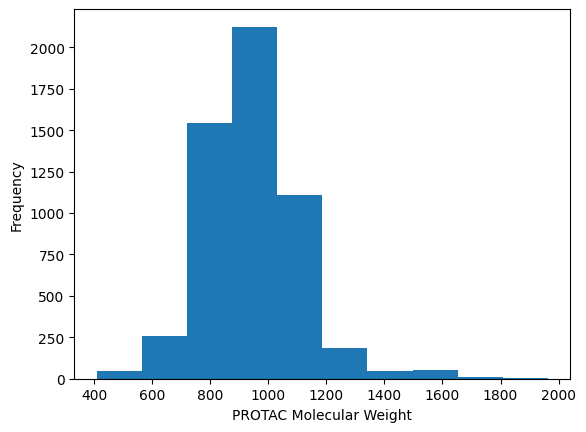

In [ ]:
plt.hist(protac_db['Molecular Weight'])
plt.xlabel('PROTAC Molecular Weight')
plt.ylabel('Frequency')
plt.plot()

[]

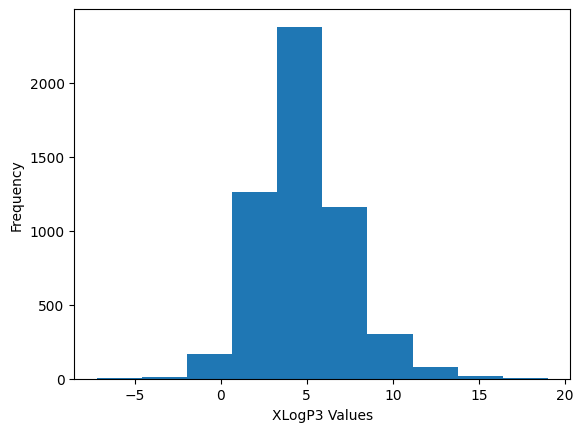

In [ ]:
plt.hist(protac_db['XLogP3'])
plt.xlabel('XLogP3 Values')
plt.ylabel('Frequency')
plt.plot()

[]

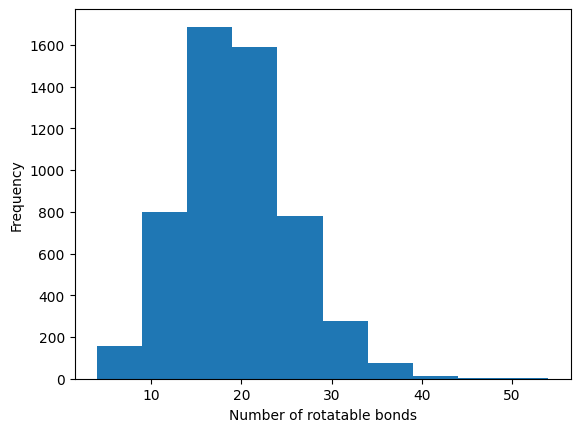

In [ ]:
plt.hist(protac_db['Rotatable Bond Count'])
plt.xlabel('Number of rotatable bonds')
plt.ylabel('Frequency')
plt.plot()

[]

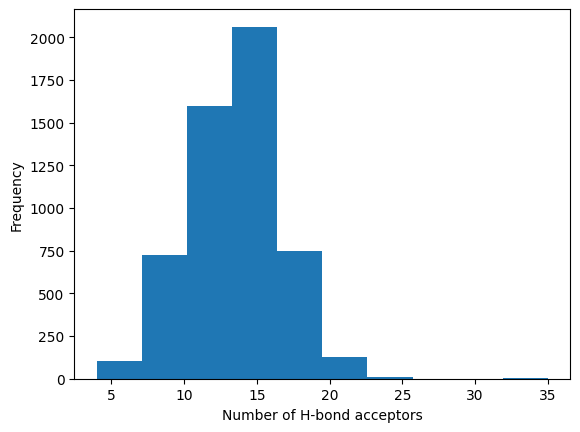

In [ ]:
plt.hist(protac_db['Hydrogen Bond Acceptor Count'])
plt.xlabel('Number of H-bond acceptors')
plt.ylabel('Frequency')
plt.plot()

[]

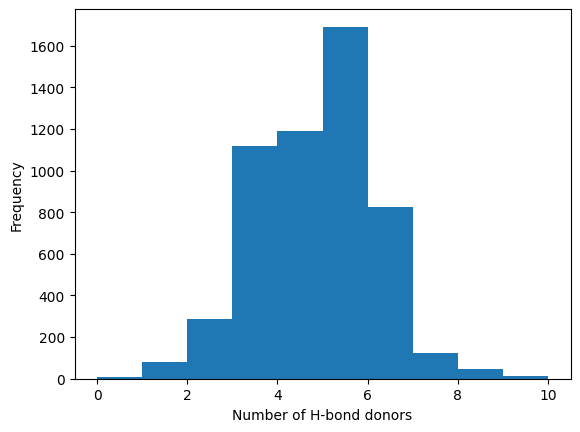

In [ ]:
plt.hist(protac_db['Hydrogen Bond Donor Count'])
plt.xlabel('Number of H-bond donors')
plt.ylabel('Frequency')
plt.plot()

For the most part, these properties look normally distributed. Now, let's take a look at the PROTAC degradation properties. "DC50 (nM)" and "Dmax (%)"  represent the half maximal degradation concentration and maximal degradation of the target protein of interest, respectively. Let's take a quick look at their distributions.

Let's first do some data cleaning

In [ ]:
# Let's first drop all the NaN values
raw_dc50 = protac_db['DC50 (nM)']
raw_dc50 = raw_dc50.dropna()

Notice that the values are all in string format with non-numerical characters such as '<', '/', and '>'. For the time being, let's remove these values.

In [ ]:
raw_dc50 = raw_dc50[~raw_dc50.str.contains('<|>|/|~|-')]
raw_dc50 = raw_dc50.astype(float)

[]

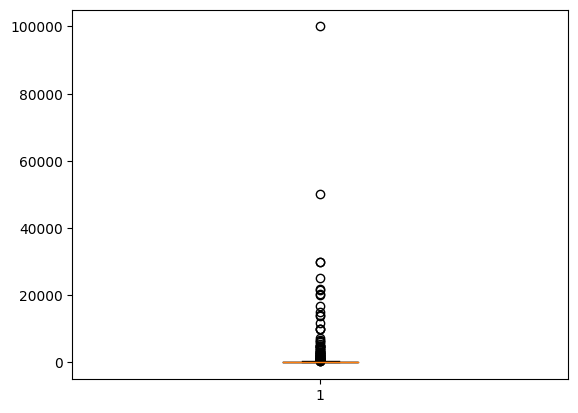

In [ ]:
plt.boxplot(raw_dc50.values)
plt.plot()

The distribution is certainly skewed and has a few outliers. Let's log normalize.

In [ ]:
lognorm_dc50 = np.log(raw_dc50)

[]

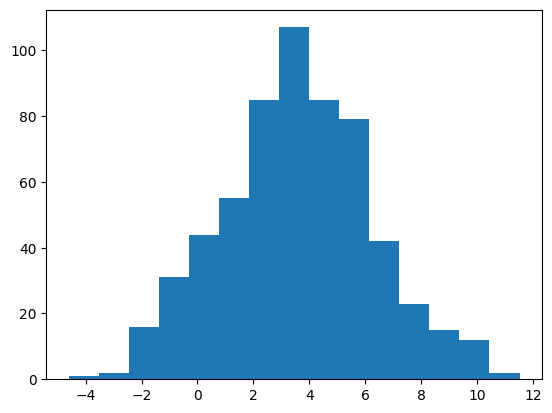

In [ ]:
plt.hist(lognorm_dc50, bins=15)
plt.plot()

Now, let's take a look at Dmax.

In [ ]:
# Using the same row indices as our cleaned DC50 data
dmax = protac_db.iloc[lognorm_dc50.index]['Dmax (%)']

In [ ]:
# Following the same data cleaning procedure:
dmax = dmax.dropna()

In [ ]:
dmax = dmax[~dmax.str.contains('<|>|/|~|-')]

In [ ]:
dmax = dmax.astype(float)

[]

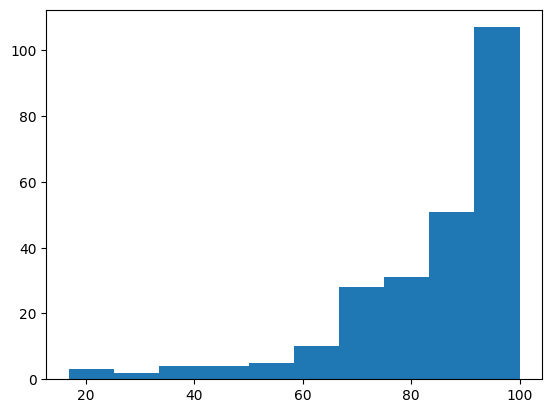

In [ ]:
plt.hist(dmax.values, bins=10)
plt.plot()

Notice that Dmax is represented as a percentage. For now, let's continue with regressing on DC50. We are now ready to featurize!

In [ ]:
# Let's predict DC50 properties for the time being
cleaned_data = protac_db.iloc[lognorm_dc50.index]
print('There are {} PROTAC samples.'.format(cleaned_data.shape[0]))

There are 599 PROTAC samples.


In [ ]:
protac_smiles = cleaned_data['Smiles']
dc_vals = lognorm_dc50

Let's featurize using CircularFingerprint which is incorporated in DeepChem! CircularFingerprint is a common featurizer for molecules that encode local information about each atom and their neighborhood. For more information, the reader is refered [here](https://pubmed.ncbi.nlm.nih.gov/16523386/).

In [ ]:
from rdkit import Chem
featurizer = dc.feat.CircularFingerprint(radius=4, chiral=True)

In [ ]:
features = featurizer.featurize(protac_smiles)

In [ ]:
# Let's initialize our dataset and perform splits
dataset = dc.data.NumpyDataset(X = features, y = dc_vals)

In [ ]:
splitter = dc.splits.RandomSplitter()
train_mols, val_mols, test_mols = splitter.train_valid_test_split(dataset)

We have successfully generated our train and test datasets. Let's now create a model to hopefully predict PROTAC degradation properties!

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
class BasicPROTACModel(nn.Module):
  def __init__(self, embedding_dim):
    super().__init__()
    self.fc1 = nn.Linear(embedding_dim, 256)
    self.fc2 = nn.Linear(256, 32)
    self.act1 = nn.ReLU()
    self.dropout = nn.Dropout(0.2)
    self.output = nn.Linear(32, 1)

  def forward(self, x):
    x = self.act1(self.fc1(x))
    x = self.dropout(self.act1(self.fc2(x)))
    output = self.output(x)
    return output

In [ ]:
embedding_dim = train_mols.X.shape[1]
protac_model = BasicPROTACModel(embedding_dim)

In [ ]:
criterion = dc.models.losses.L2Loss()
optimizer = dc.models.optimizers.Adam()

Let's now wrap everything together to instantiate a DeepChem model! Note that due to the small sample size, a smaller batch size actually helps performance.

In [ ]:
# Let's log every train epoch
batch_size = 10
log_freq = int(len(train_mols) / batch_size +1)
protac_model = dc.models.torch_models.TorchModel(protac_model, loss=criterion, optimizer=optimizer, batch_size=10, log_frequency=log_freq)
param_count = sum(p.numel() for p in protac_model.model.parameters() if p.requires_grad)
print("There are {} trainable parameters".format(param_count))
protac_model.model

There are 532801 trainable parameters


BasicPROTACModel(
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=32, bias=True)
  (act1): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (output): Linear(in_features=32, out_features=1, bias=True)
)

Let's define the validation function to prevent overfitting.

In [ ]:
train_losses = []
val_losses = []
metric = [dc.metrics.Metric(dc.metrics.mean_squared_error)]

n_epochs=100
for i in range(n_epochs):
  protac_model.fit(train_mols, nb_epoch=1, all_losses=train_losses)

  # Validate on every other epoch
  if i % 2 == 0:
    loss = protac_model.evaluate(val_mols, metrics=metric)
    val_losses.append(loss['mean_squared_error'])

We can easily look at how the training went through plotting the recorded losses.

[]

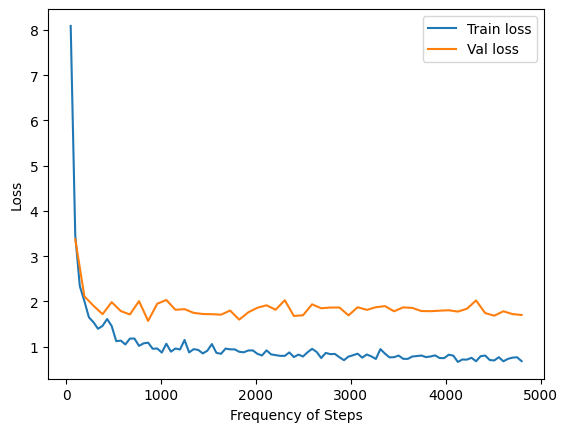

In [ ]:
train_steps = [(i+1)*log_freq for i in range(len(train_losses))]
val_steps = [(i+1)*(log_freq*2) for i in range(len(val_losses))]
plt.plot(train_steps, train_losses, label='Train loss')
plt.plot(val_steps, val_losses, label='Val loss')
plt.legend()
plt.xlabel('Frequency of Steps')
plt.ylabel('Loss')
plt.plot()

Let's now perform some inference on our test set to evaluate our model!

In [ ]:
metrics = [dc.metrics.Metric(dc.metrics.mean_squared_error), dc.metrics.Metric(dc.metrics.pearsonr), dc.metrics.Metric(dc.metrics.pearson_r2_score)]
eval_metrics = protac_model.evaluate(test_mols, metrics)
preds = protac_model.predict(test_mols)

In [ ]:
for k, v in eval_metrics.items():
  print('{}: {}'.format(k, v))

mean_squared_error: 1.9046742949856112
pearsonr: 0.8937105652805958
pearson_r2_score: 0.7987185744941621


[]

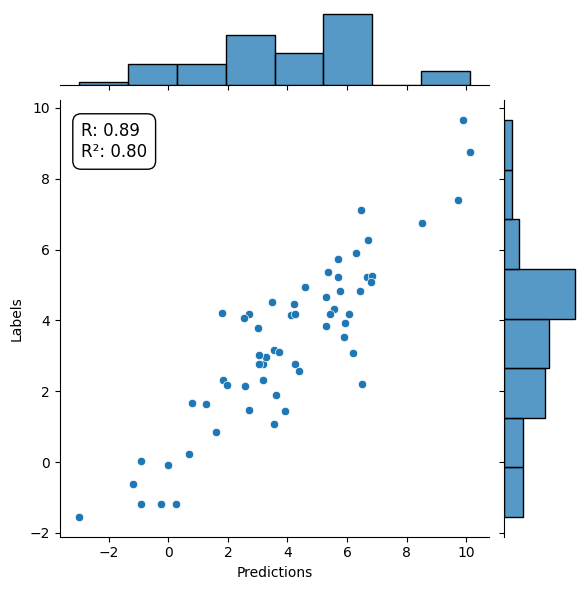

In [ ]:
import seaborn as sns
preds_and_labels = np.concatenate((test_mols.y.reshape(60, 1), preds), axis=1)
pred_df = pd.DataFrame(preds_and_labels, columns=['Predictions', 'Labels'])
sns.jointplot(pred_df, x='Predictions', y='Labels')
plt.annotate(f"R: {eval_metrics['pearsonr']:.2f}\nR²: {eval_metrics['pearson_r2_score']:.2f}",
             xy=(0.05, 0.95),
             xycoords='axes fraction',
             ha='left',
             va='top',
             fontsize=12,
             bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))
plt.plot()

# **Congratulations! Time to join the Community!**

Congratulations on completing this tutorial notebook! If you enjoyed working through the tutorial, and want to continue working with DeepChem, we encourage you to finish the rest of the tutorials in this series. You can also help the DeepChem community in the following ways:



## Star DeepChem on [GitHub](https://github.com/deepchem/deepchem)

This helps build awareness of the DeepChem project and the tools for open source drug discovery that we're trying to build.